### Q1: What are missing values in a dataset? Why is it essential to handle missing values? Name some algorithms that are not affected by missing values.

Missing Data can occur when no information is provided for one or more items or for a whole unit. Missing Data is a very big problem in a real-life scenarios. Missing Data can also refer to as NA(Not Available) values in pandas. In DataFrame sometimes many datasets simply arrive with missing data, either because it exists and was not collected or it never existed. For Example, Suppose different users being surveyed may choose not to share their income, some users may choose not to share the address in this way many datasets went missing.

The handling of missing data is very important during the preprocessing of the dataset as many machine learning algorithms do not support missing values.Most of the machine learning algorithms cannot process missing values in the dataset, hence it must be handled prior to the modeling pipeline.

Algorithms that are not affected by missisng values:
1. Histogram based gradient boosting
2. k-nearest
3. Naive Bayes
4. Forest algorithms

### Q2: List down techniques used to handle missing data.  Give an example of each with python code.

Techniques used to handle the missing values are:
1. Deleting Rows with missing values
2. Impute missing values for continuous variable
3. Impute missing values for categorical variable
4. Other Imputation Methods
5. Using Algorithms that support missing values
6. Prediction of missing values
7. Imputation using Deep Learning Library — Datawig

Dataset Used : Titanic.csv

In [6]:
!pip install missingno

In [7]:
import pandas as pd
import numpy as np
import missingno as msno
df = pd.read_csv("titanic_dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot: >

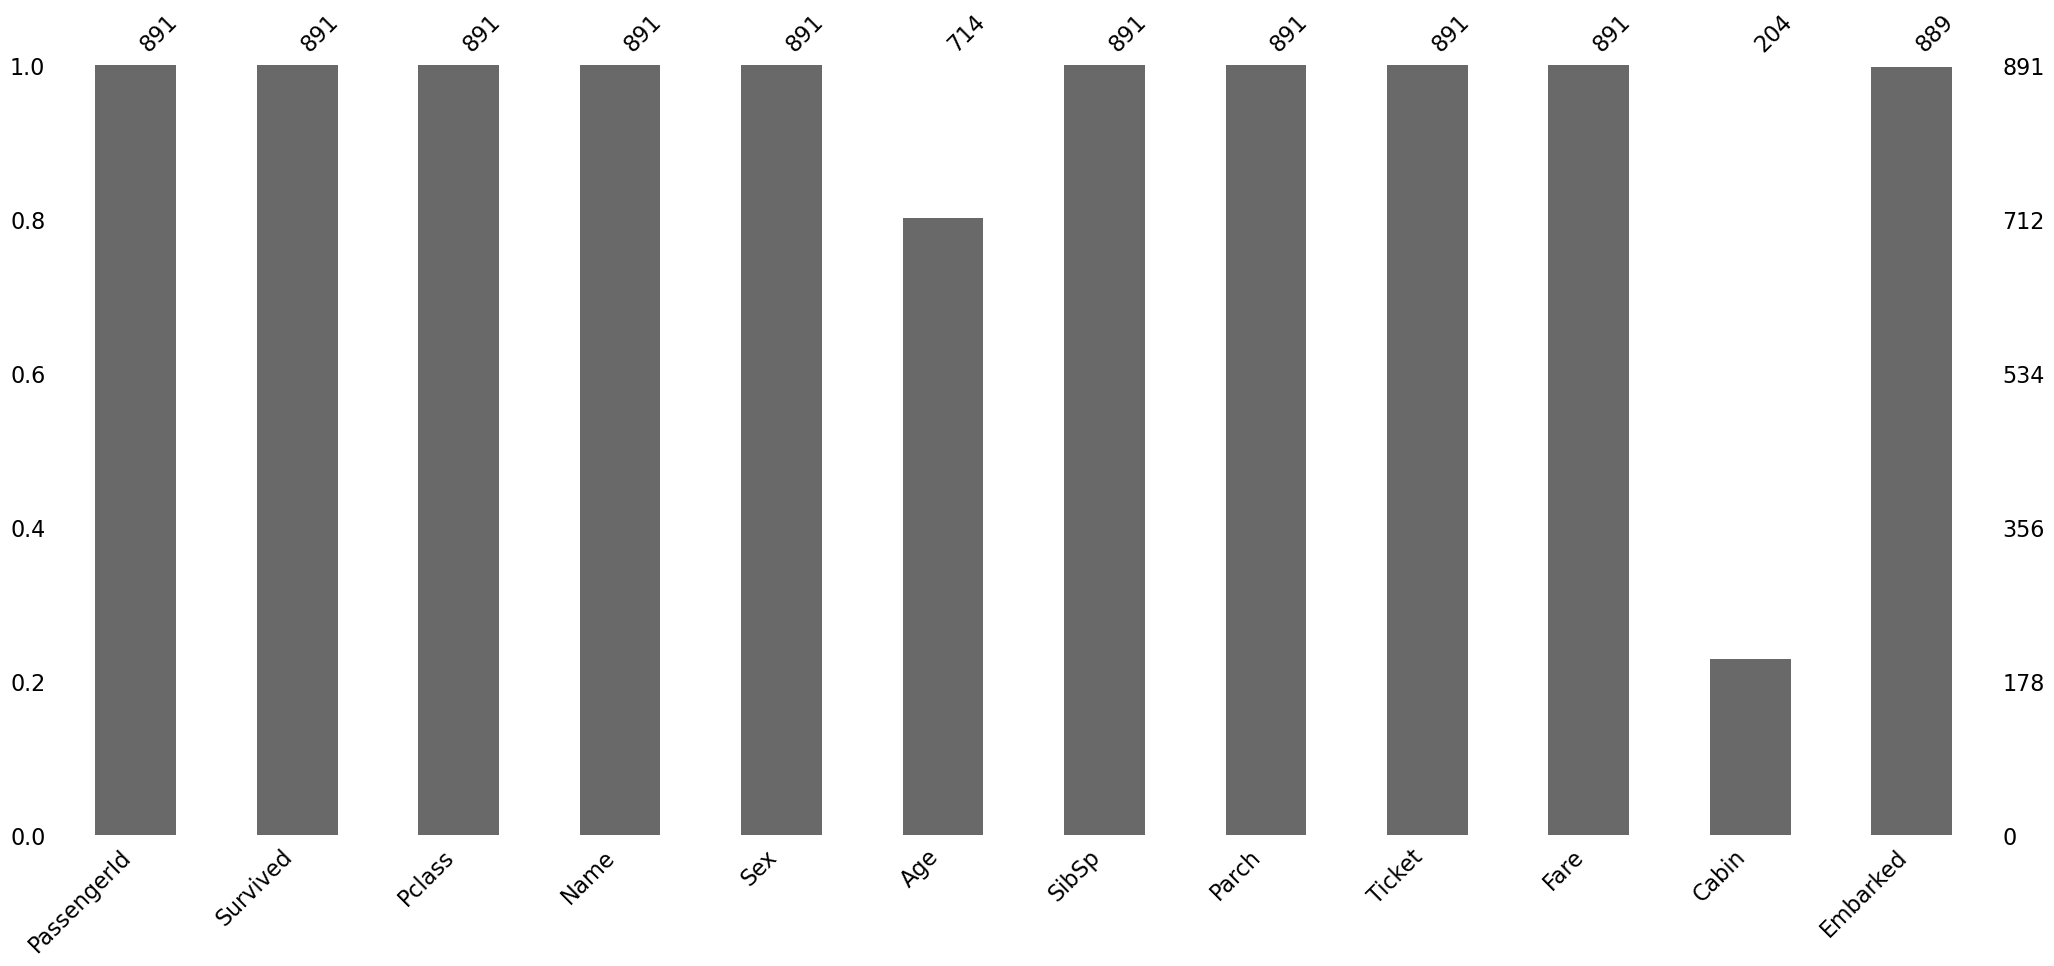

In [9]:
msno.bar(df)

In [16]:
# observation: 'Age' and 'Cabin' columns have missng values

#### 1. Deleting rows with missing values

Missing values can be handled by deleting the rows or columns having null values. If columns have more than half of the rows as null then the entire column can be dropped. The rows which are having one or more columns values as null can also be dropped.

A model trained with the removal of all missing values creates a robust model but it can lead to a huge amount of data loss. Also Works poorly if the percentage of missing values is excessive in comparison to the complete dataset.


In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
df.shape

(891, 12)

In [15]:
df.dropna(inplace = True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

#### 2. Impute missing values with Mean/Median:

Columns in the dataset which are having numeric continuous values can be replaced with the mean, median, or mode of remaining values in the column. This method can prevent the loss of data compared to the earlier method.

In [20]:
df = pd.read_csv("titanic_dataset.csv")

In [23]:
df["Age"].isnull().sum()

177

In [26]:
df["Age"] = df["Age"].fillna(df["Age"].mean())

In [27]:
df["Age"].isnull().sum()

0

#### 3. Imputation method for categorical columns:

In [30]:
mode_val = df["Embarked"].mode()

In [40]:
df["Embarked"] = df["Embarked"].replace(to_replace = np.NaN,value = "mode_val")

In [42]:
df["Embarked"].isnull().sum()

0

#### 4. Other Imputation Methods

Depending on the nature of the data or data type, some other imputation methods may be more appropriate to impute missing values.

- For example, for the data variable having longitudinal behavior, it might make sense to use the last valid observation to fill the missing value. This is known as the Last observation carried forward (LOCF) method.
- For the time-series dataset variable, it makes sense to use the interpolation of the variable before and after a timestamp for a missing value.



In [2]:
# Last observation carried forward method (LOCF):
import pandas as pd
df1 = pd.read_csv("titanic_dataset.csv")

In [3]:
df1["Age"] = df1["Age"].fillna(method = "ffill")

In [4]:
df1["Age"].isna().sum()

0

In [7]:
# Interpolation method
df2 = pd.read_csv("titanic_dataset.csv")
df2["Age"].isnull().sum()

177

In [8]:
df2["Age"] = df2["Age"].interpolate(method = "linear",limit_direction = "forward")

In [9]:
df2["Age"].isnull().sum()

0

#### 5. Using Algorithms that support missing values:
Some algorithms such as k-NN , Naive Bayes and Random forest does support missing values. No need to handle missing values in each column as ML algorithms will handle them efficiently.

Cons: No implementation of these ML algorithms in the scikit-learn library.


#### 6. Prediction of missing values:
The regression or classification model can be used for the prediction of missing values depending on the nature (categorical or continuous) of the feature having missing value.It gives a better result than earlier methods.Also takes into account the covariance between the missing value column and other columns.


#### 7. Imputation using Deep Learning Library — Datawig
This method works very well with categorical, continuous, and non-numerical features. Datawig is a library that learns ML models using Deep Neural Networks to impute missing values in the datagram.

### Q3: Explain the imbalanced data. What will happen if imbalanced data is not handled?

Data imbalance usually reflects an unequal distribution of classes within a dataset. A classification data set with skewed class proportions is called imbalanced. Classes that make up a large proportion of the data set are called majority classes. Those that make up a smaller proportion are minority classes.

Imblalanced data counts:

Degree of imbalance	 &   Proportion of Minority Class
- Mild:	                  20-40% of the data set
- Moderate:	              1-20% of the data set
- Extreme:                <1% of the data set

Consider the example of a model that detects fraud. Instances of fraud happen once per 200 transactions in this data set, so in the true distribution, about 0.5% of the data is positive. With so few positives relative to negatives, the training model will spend most of its time on negative examples and not learn enough from positive ones. For example, if your batch size is 128, many batches will have no positive examples, so the gradients will be less informative.

### Q4: What are Up-sampling and Down-sampling? Explain with an example when up-sampling and downsampling are required.

#### Upsampling:
It is a method used to increase the number of instances in a dataset. It is commonly used when there is an imbalanced distribution of data, with one class being significantly underrepresented. Upsampling involves generating synthetic data points that are similar to the existing data, and adding them to the dataset.

    Example: In medical diagnosis, the prevalence of certain diseases may be significantly lower than others. For instance, in rare diseases, the number of positive cases may be limited compared to negative cases. Upsampling can help address this issue by generating synthetic instances of positive cases, allowing the model to learn from a more diverse dataset and improve its diagnostic accuracy.

#### Down-Sampling: 
Downsampling is a method used to decrease the size of a dataset by removing some of the instances. This is often done to reduce computational complexity and training time, and to eliminate redundancy or irrelevant instances from the dataset. When dealing with large datasets or real-time processing, downsampling can be beneficial as it reduces the computational load and memory requirements.

    Example: One of the primary applications of downsampling is in image processing. By reducing the resolution of an image, downsampling enables efficient storage and transmission, making it an essential component of image compression algorithms like JPEG.

### Q5: What is data Augmentation? Explain SMOTE.

#### Data augmentation 
It is the process of increasing the amount and diversity of data. We do not collect new data, rather we transform the already present data. It is a technique of artificially increasing the training set by creating modified copies of a dataset using existing data. It includes making minor changes to the dataset or using deep learning to generate new data points.  

#### SMOTE(Synthetic Minority Oversampling Technique):
SMOTE is an algorithm that performs data augmentation by creating synthetic data points based on the original data points. SMOTE can be seen as an advanced version of oversampling, or as a specific algorithm for data augmentation. The advantage of SMOTE is that you are not generating duplicates, but rather creating synthetic data points that are slightly different from the original data points. SMOTE synthesises new minority instances between existing minority instances. It generates the virtual training records by linear interpolation for the minority class. These synthetic training records are generated by randomly selecting one or more of the k-nearest neighbors for each example in the minority class. After the oversampling process, the data is reconstructed and several classification models can be applied for the processed data.

The SMOTE algorithm works as follows:

You draw a random sample from the minority class.
For the observations in this sample, you will identify the k nearest neighbors.
You will then take one of those neighbors and identify the vector between the current data point and the selected neighbor.
You multiply the vector by a random number between 0 and 1.
To obtain the synthetic data point, you add this to the current data point.

This operation is actually very much like slightly moving the data point in the direction of its neighbor. This way, you make sure that your synthetic data point is not an exact copy of an existing data point while making sure that it is also not too different from the known observations in your minority class.

### Q6: What are outliers in a dataset? Why is it essential to handle outliers?

Outliers are those data points that are significantly different from the rest of the dataset. They are often abnormal observations that skew the data distribution, and arise due to inconsistent data entry, or erroneous observations.

Reason to handle outliers:
As outliers are very different values—abnormally low or abnormally high—their presence can often skew the results of statistical analyses on the dataset. This could lead to less effective and less useful models.
Outliers can have a significant impact on the accuracy of machine learning models. If outliers are not detected and handled appropriately, they can lead to overfitting, underfitting, or biased results. For instance, in fraud detection, failing to detect fraudulent transactions can lead to significant financial losses. In the medical field, failing to detect an outlier in patient data can result in incorrect diagnoses and treatments.



### Q7: You are working on a project that requires analyzing customer data. However, you notice that some of the data is missing. What are some techniques you can use to handle the missing data in your analysis?

First Step is to identify the type of missing data. There are three main types of missing data: (1) Missing Completely at Random (MCAR), (2) Missing at Random (MAR), and (3) Missing Not at Random (MNAR).

Next, there are various methods that can be applied to identify the missing data:

- isnull(): This function returns a pandas dataframe, where each value is a boolean value True if the value is missing, False otherwise.

- .notnull(): Similarly to the previous function, the values for this one are False if either NaN or None value is detected.

- .info(): This function generates three main columns, including the “Non-Null Count” which shows the number of non-missing values for each column.

- .isna(): This one is similar to isnull and notnull. However it shows True only when the missing value is NaN type. 

#### Techniques to be applied to handle the missing data:

1.  Data Dropping
Using the dropna() function is the easiest way to remove observations or features with missing values from the dataframe. Below are some techniques. 

Drop observations with missing values: 

These three scenarios can happen when trying to remove observations from a data set: dropna(): drops all the rows with missing values.

2) Drop columns with missing values
The parameter axis = 1 can be used to explicitly specify we are interested in columns rather than rows. dropna(axis = 1): drops all the columns with missing values.

3) Mean/Median Imputation
Mean and median imputations are respectively used to replace missing values of a given column with the mean and median of the non-missing values in that column. Normal distribution is the ideal scenario. Unfortunately, it is not always the case. This is where the median imputation can be helpful because it is not sensitive to outliers.In Python, the fillna() function from pandas can be used to make these replacements. 

4) Random Sample Imputation
The idea behind the random sample imputation is different from the previous ones and involves additional steps. 

First, it starts by creating two subsets from the original data. The first subset contains all the observations without missing data, and the second one contains those with missing data. Then, it randomly selects from each subset a random observation.
Furthermore, the missing data from the previously selected observation is replaced with the existing ones from the observation having all the data available.Finally, the process continues until there is no more missing information.

5) Multiple Imputation
This is a multivariate imputation technique, meaning that the missing information is filled by taking into consideration the information from the other columns. For instance, if the income value is missing for an individual, it is uncertain whether or not they have a mortgage. So, to determine the correct value, it is necessary to evaluate other characteristics such as credit score, occupation, and whether or not the individual owns a house.

### Q8: You are working with a large dataset and find that a small percentage of the data is missing. What are some strategies you can use to determine if the missing data is missing at random or if there is a pattern to the missing data.


The missing data can be identified based on the following strategies:
1. Missing completely at random(MCAR): MCAR is  a type of missing data mechanism in which the probability of a value being missing is unrelated to both thr observed data and the missing data. They missing data is randomly distributed throughout the dataset and there is no systematic relation for wht they are missing.

2. Missing at random (MAR): In contrast to MCAR, MAR does not assume that the other variables cannot predict the missing value. This type is perhaps more often the case when there are errors with recording the data correctly. The probability of value bein missing depends only on the observed data but not on the missing data.

3. Missing not at random: In this type of missing data mechanism, the probability of missing values depends on value of missing data itself. The missingness of data is not random and is dependent on unobserved or unmeasured factors that are associated with missing values.

The missing datapoints will fall in one of the above categories listed above and can be identified accordingly.

### Q9: Suppose you are working on a medical diagnosis project and find that the majority of patients in the dataset do not have the condition of interest, while a small percentage do. What are some strategies you can use to evaluate the performance of your machine learning model on this imbalanced dataset?

#### SMOTE: 
Since a small number of dataset have the condition of interest, the data needs to be over-sample so that the model does not give a biased prediciton towards majority datasets.
Medical diagnosis project should keep in view of the following:
- true positives (the model correctly predicted true)
- false positives (the model incorrectly predicted true)
- true negatives (the model correctly predicted false)
- false negatives (the model incorrectly predicted false)

True positives and true negatives are both correct predictions: having many of those is the ideal situation. False positives and false negatives are both wrong predictions: having little of them is the ideal case as well. Yet in many cases, we may prefer having false positives rather than having false negatives. An obvious example would be testing for the coronavirus. Imagine that sick people take a test and they obtain a false negative: they will go out and infect other people. On the other hand, if they are false positive they will be obliged to stay home: not ideal, but at least they do not form a public health hazard.

When we have a strong class imbalance, we have very few cases in one class, resulting in the model hardly ever predicting that class. Using SMOTE we can tweak the model to reduce false negatives, at the cost of increasing false positives. The result of using SMOTE is generally an increase in recall, at the cost of lower precision. This means that we will add more predictions of the minority class: some of them correct (increasing recall), but some of them wrong (decreasing precision).

#### Maximum Likelihood
A large class of model-based procedures arises from defining a model for the variables with missing values and making statistical inferences based on what are called maximum likelihood (ML) methods. Model-based methods are quite flexible and clearly set forth underlying model assumptions so that they can be evaluated.

#### Multiple Imputation
Multiple imputation (MI) has emerged as a popular technique for dealing with missing data problems. The technique of multiple imputation involves creating multiple complete data sets by filling in values for the missing data. Then, each filled-in data set is analyzed as if it were a complete data set.The inferences for the filled-in data sets are then combined into one result by averaging over the filled-in data sets.

### Q10: When attempting to estimate customer satisfaction for a project, you discover that the dataset is unbalanced, with the bulk of customers reporting being satisfied. What methods can you employ to balance the dataset and down-sample the majority class?

Downsampling is the process of reducing the number of samples in a signal. Some common downsampling methods include decimation, averaging, and maximum decimation. Decimation involves reducing the sample rate by an integer factor, while averaging involves taking the average of groups of samples. Maximum decimation involves selecting the maximum value from groups of samples. There are also more advanced downsampling techniques such as wavelet-based methods and filter-bank downsampling.

### Q11: You discover that the dataset is unbalanced with a low percentage of occurrences while working on a project that requires you to estimate the occurrence of a rare event. What methods can you employ to balance the dataset and up-sample the minority class?

Upsampling or Oversampling refers to the technique to create artificial or duplicate data points or of the minority class sample to balance the class label. There are various oversampling techniques that can be used to create artificial data points.

1. Random Over Sampling:
Random oversampling is the simplest oversampling technique to balance the imbalanced nature of the dataset. It balances the data by replicating the minority class samples. This does not cause any loss of information, but the dataset is prone to overfitting as the same information is copied.

2. SMOTE:
In the case of random oversampling, it was prone to overfitting as the minority class samples are replicated, here SMOTE comes into the picture. SMOTE stands for Synthetic Minority Oversampling Technique. It creates new synthetic samples to balance the dataset.SMOTE works by utilizing a k-nearest neighbor algorithm to create synthetic data.